# EPS FALL 2024 CA3
### name: Ali Chegini
### SID:801801064

### Q1: sampling and central limit theorom

In [157]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Average and Variance of Distributions: 


Possion Distribution:  
$$X \sim \text{Poi}(\lambda = 10)$$
$$\mathbb{E}[X] = \lambda = 10$$  
$$\sigma_X = \sqrt{\lambda} = \sqrt{10}$$   
Exponential Distribution:
$$Y \sim \text{Exp}(\lambda = \frac{1}{2})$$  
$$\mathbb{E}[Y] = \frac{1}{\lambda} = 2 $$
$$\sigma_Y = \frac{1}{\lambda} = 2$$
Geometric Distribution:  
$$Z \sim \text{Geo}(p  = \frac{1}{5})$$
$$\mathbb{E}[Z] = \frac{1}{p} = 5 $$ 
$$\sigma_Z = \sqrt{\frac{1 - p}{p ^ 2}} = \sqrt{20}$$

In [158]:
sample_sizes = [30, 300, 3000]
poi_lambda = 10
expon_lambda = 0.5
geo_p = 0.2
num_of_samples = 1000

poi_samples = {size: [] for size in sample_sizes}
exp_samples = {size: [] for size in sample_sizes}
geo_samples = {size: [] for size in sample_sizes}

for sample_size in sample_sizes:
    for _ in range(num_of_samples):
        poi_samples[sample_size].append(
            stats.poisson.rvs(mu=poi_lambda, size=sample_size)
        )
        exp_samples[sample_size].append(
            stats.expon.rvs(scale=1 / expon_lambda, size=sample_size)
        )
        geo_samples[sample_size].append(
            stats.geom.rvs(p=geo_p, size=sample_size)
        )


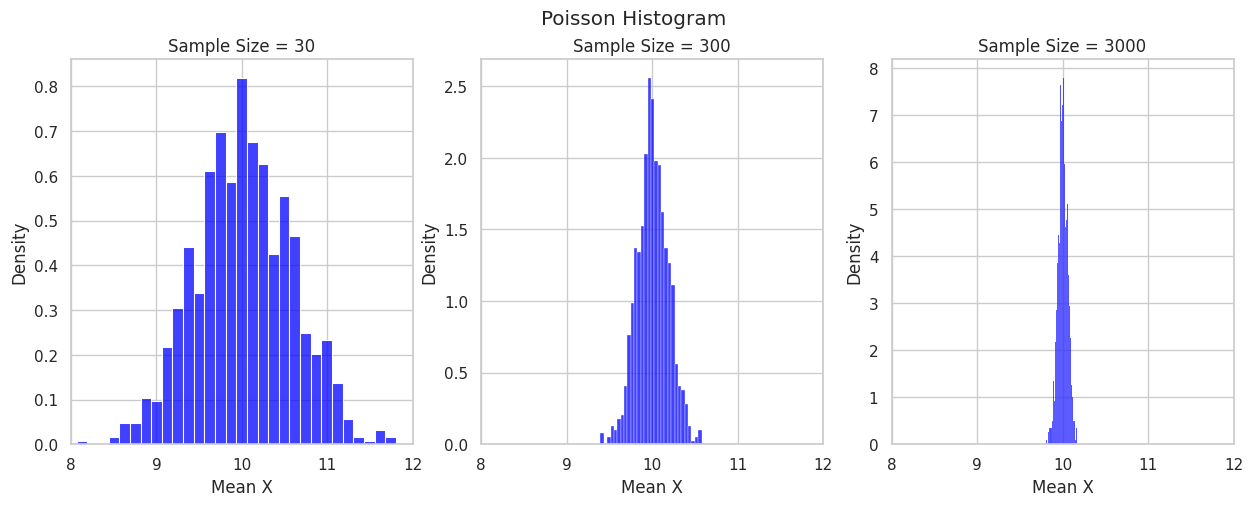

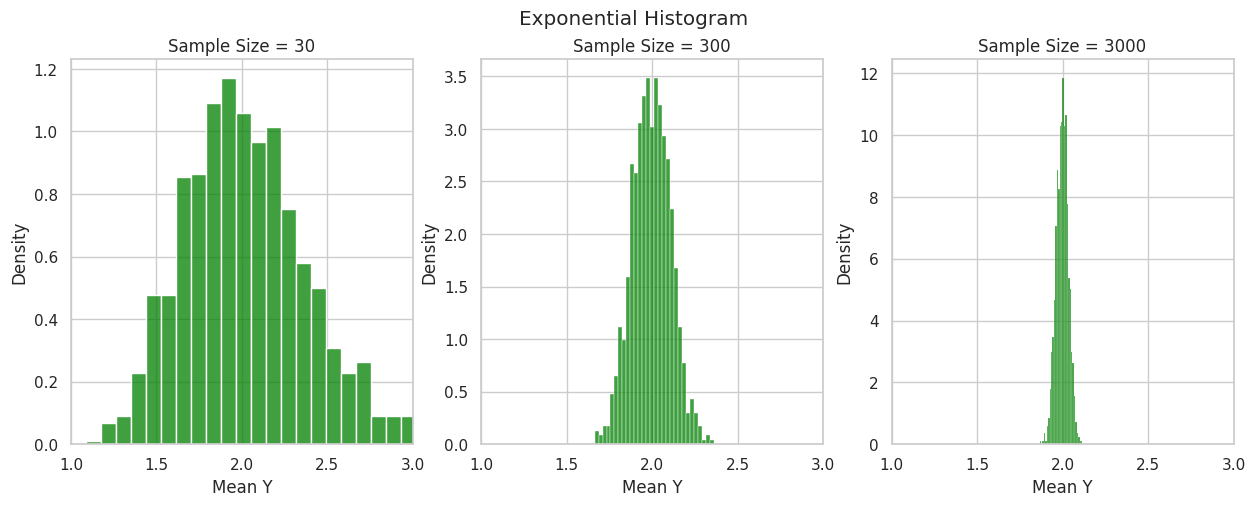

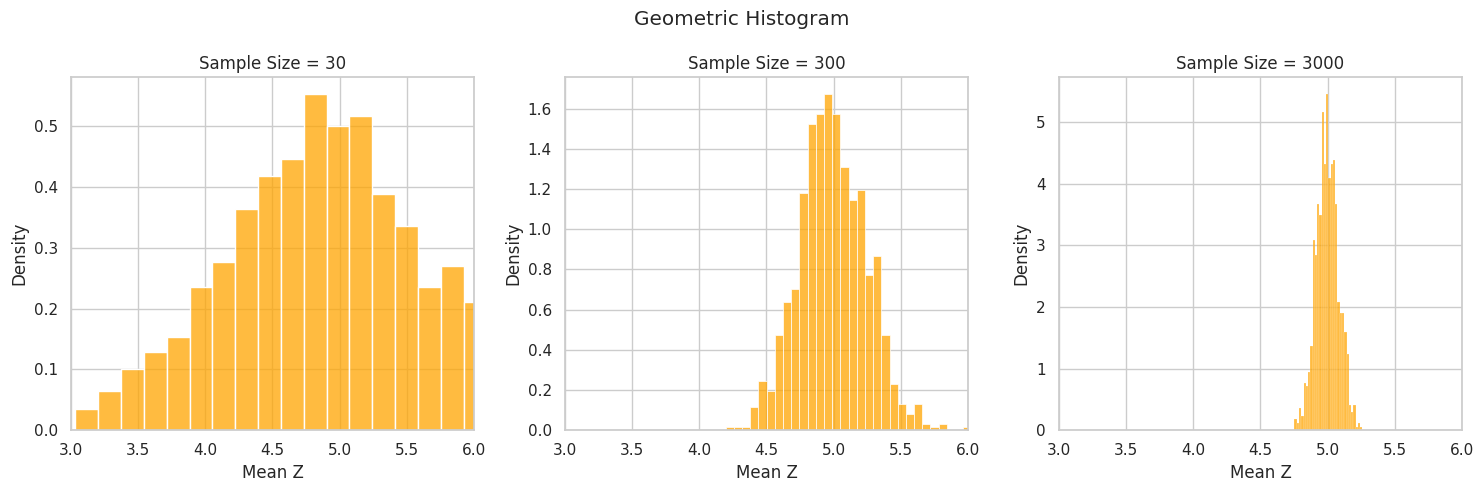

In [159]:
sns.set(style = "whitegrid", palette = "muted")
fig1, ax1 = plt.subplots(1, 3,  figsize=(15, 5))
fig2, ax2 = plt.subplots(1, 3, figsize=(15, 5))
fig3, ax3 = plt.subplots(1, 3, figsize=(15, 5))


for i, size in enumerate(sample_sizes):
    #sns.set_theme()

    # Poisson histogram
    fig1.suptitle("Poisson Histogram")
    ax1[i].set_title(f"Sample Size = {size}")
    ax1[i].set_xlabel("Mean X")
    ax1[i].set_ylabel("Density")
    ax1[i].set_xlim(8, 12)
    sns.histplot(np.mean(poi_samples[size], axis=1), bins=30, ax=ax1[i], color = 'blue', stat = 'density')

    # Exponential histogram
    fig2.suptitle("Exponential Histogram")
    ax2[i].set_title(f"Sample Size = {size}")
    ax2[i].set_xlabel("Mean Y")
    ax2[i].set_ylabel("Density")
    ax2[i].set_xlim(1, 3)
    sns.histplot(np.mean(exp_samples[size], axis=1), bins=30, ax=ax2[i], color = 'green', stat = 'density')

    # Geometric histogram
    fig3.suptitle("Geometric Histogram")
    ax3[i].set_title(f"Sample Size = {size}")
    ax3[i].set_xlabel("Mean Z")
    ax3[i].set_ylabel("Density")
    ax3[i].set_xlim(3, 6)
    sns.histplot(np.mean(geo_samples[size], axis=1), bins=30, ax=ax3[i], color = 'orange', stat = 'density')
plt.tight_layout()
plt.show()


### Mean and standard error of Distributions above with different sample size

### standard error:
$$SE = \frac{\sigma}{\sqrt{n}}$$


In [160]:
import pandas as pd
summary_data = {
    'Sample Size': [],
    'Poisson Mean': [],
    'Poisson std_err': [],
    'Exponential Mean': [],
    'Exponential std_err': [],
    'Geometric Mean': [],
    'Geometric std_err': []
}

In [161]:
summary_data = {
    'Sample Size': sample_sizes,
    'mean of poisson sample means': [np.mean(poi_samples[size]) for size in sample_sizes],
    'std_err of poisson sample means': [np.std(np.mean(poi_samples[size], axis=1)) / np.sqrt(sample_size) for size in sample_sizes],
    'mean of Exponential sample means': [np.mean(exp_samples[size]) for size in sample_sizes],
    'std err of Exponential sample means': [np.std(np.mean(exp_samples[size], axis=1)) / np.sqrt(sample_size) for size in sample_sizes],
    'mean of Geometric sample means': [np.mean(geo_samples[size]) for size in sample_sizes],
    'std err of Geometric sample_means': [np.std(np.mean(geo_samples[size], axis=1)) / np.sqrt(sample_size) for size in sample_sizes]
}
summary_df = pd.DataFrame(summary_data)

display(summary_df)

,Sample Size,mean of poisson sample means,std_err of poisson sample means,mean of Exponential sample means,std err of Exponential sample means,mean of Geometric sample means,std err of Geometric sample_means
0,30,10.016033,0.010321,2.025214,0.006701,5.005533,0.015212
1,300,10.005953,0.003338,1.996151,0.002022,4.995100,0.004567
2,3000,10.001174,0.001035,1.998316,0.000650,4.997932,0.001505


### Analysis: 
it is clear that the more the sample size, the  of mean sample or so called $\mathbb{E}[{\bar{X}}]$ will tend to approach the mean of the Distribution itself , and also standard error tends to approach zero the reason for that is that we know:  

Let $\bar{X}$ the sample mean and $n$ the sample size
$$E[\bar{X}] = \mu$$
if: $$n \to \infty$$
then : $$SE = \frac{\sigma}{\sqrt{n}} \to 0$$


### plotting normal with same mean and variance next to each plot

Histograms are normilzed to show Density instead of frequency as thier ylabel and them are compared to a normal distrubtion  
with $\mu , \sigma^2$ which are theoretical mean and variance of the original Distributions

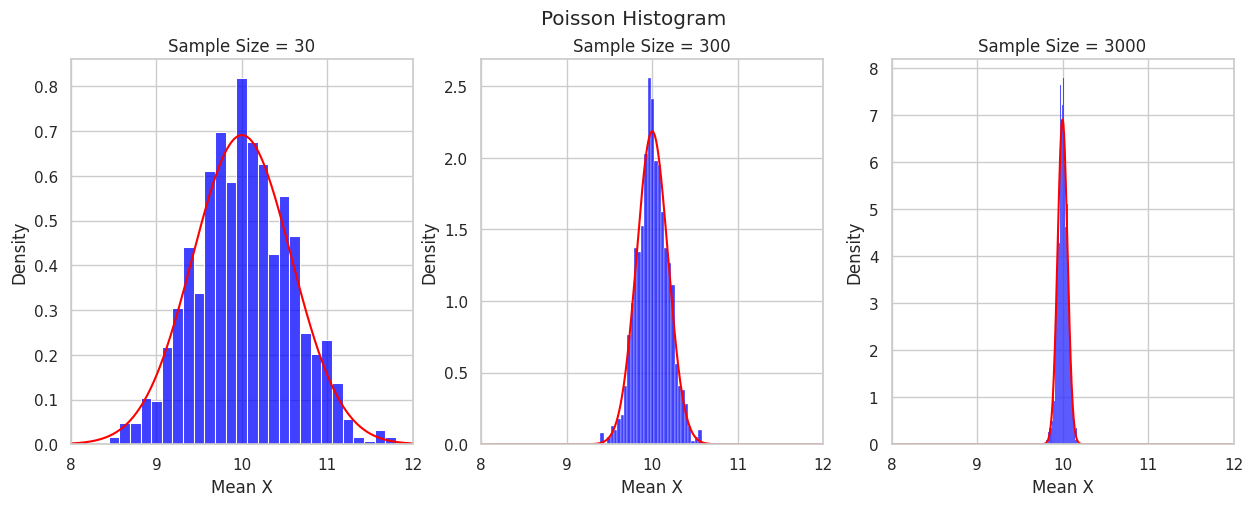

In [162]:
normal_x = np.linspace(8, 12, 1000)
for i, size in enumerate(sample_sizes):
    poi_mean = poi_lambda
    poi_std_dev = np.sqrt(poi_lambda) / np.sqrt(size)
    normal_pdf = stats.norm.pdf(normal_x, loc = poi_mean, scale = poi_std_dev)
    ax1[i].plot(normal_x, normal_pdf, color = 'red', label = 'Normal PDF')
fig1

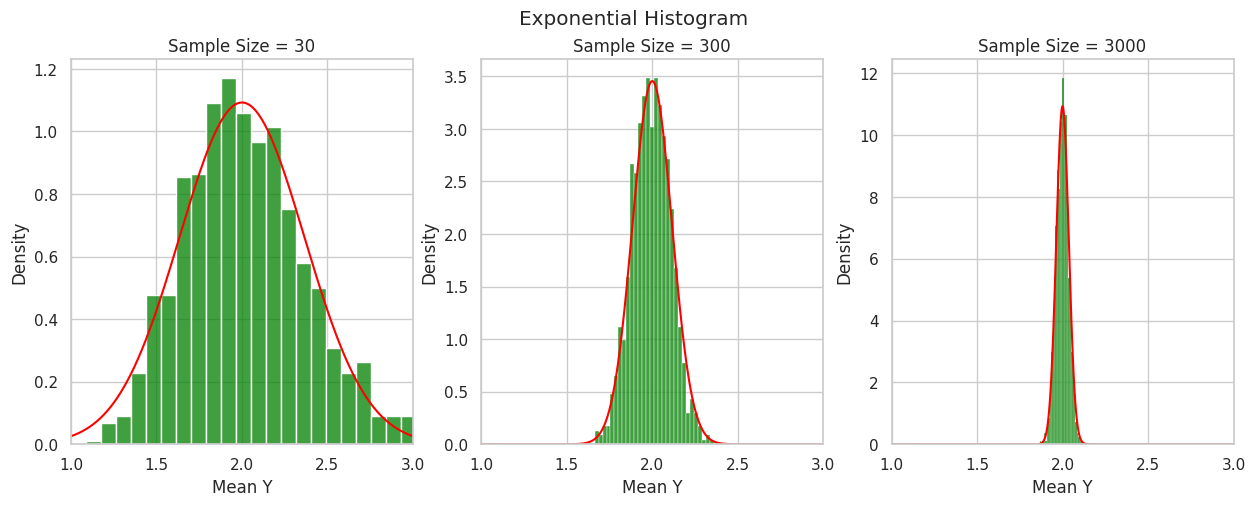

In [163]:
normal_x = np.linspace(1, 3, 1000)
for i , sample_size in enumerate(sample_sizes):
    exp_mean = 1 / expon_lambda
    exp_std_dev = (1 / expon_lambda) / np.sqrt(sample_size)
    normal_pdf2 = stats.norm.pdf(normal_x, loc = exp_mean, scale = exp_std_dev)
    ax2[i].plot(normal_x, normal_pdf2, color = 'red', label = 'normal PDF')
fig2

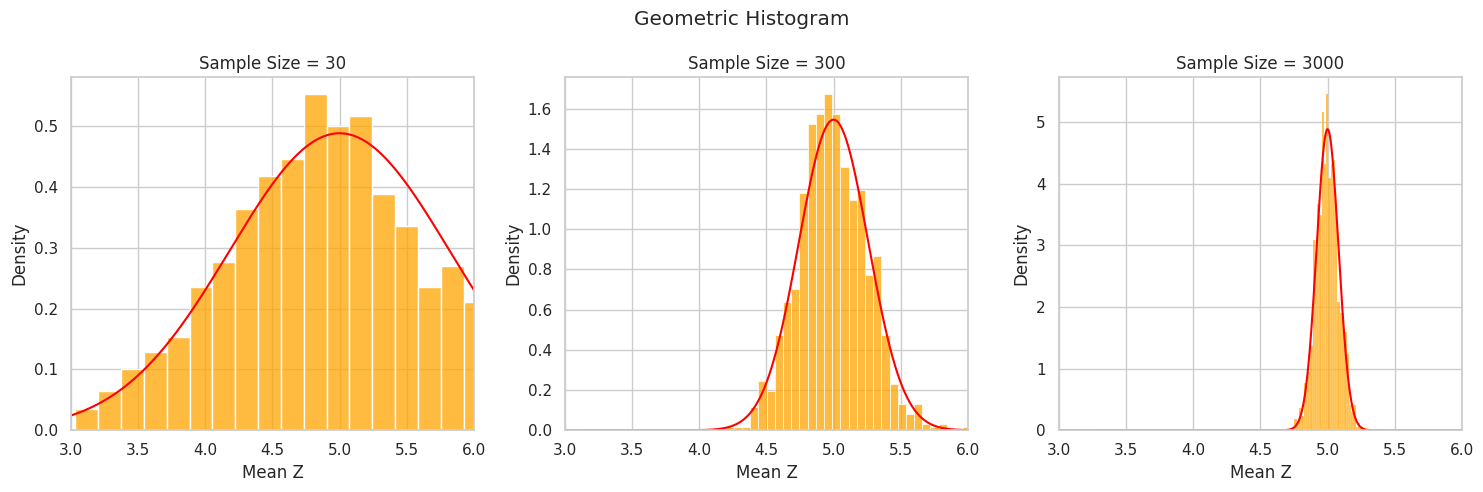

In [164]:
normal_x = np.linspace(3, 6, 1000)
for i , sample_size in enumerate(sample_sizes):
    geo_mean = 1 / geo_p
    geo_std_dev = (np.sqrt(1 - geo_p) / geo_p) / np.sqrt(sample_size)
    normal_pdf = stats.norm.pdf(normal_x, loc = geo_mean, scale = geo_std_dev)
    ax3[i].plot(normal_x, normal_pdf, color = 'red', label = 'normal PDF')
fig3

### Analysis 

As it is visualized above , for all three sizes meaning 30, 300, 3000 the graph are pretty much alligned with normal distribtion because in EPS (number 30) is already a high sample size for a sample, and according to centeral limit theorom , we expect for it to be alligned with normal distribution but as n tends to get bigger 
this allignment tends to look more percise and better 
the mean is mean is almost constant for every sample size because as said before sample size 30 is already a big number but the change in variance as n gets bigger is much more visible , we can see as n increase , variance between sample means is getting close to zero 

$$\bar{X_1} + \bar{X_1} + ... \bar{X_n} \sim \mathcal{N}(nE[\bar{X}], n\sigma_{\bar{X}} ^ 2)$$


and because every sample size is relativly large it can be said: 
$$ \mathcal{N}(nE[\bar{X}], n\sigma_{\bar{X}} ^ 2) = \mathcal{N}(n\mu, n\sigma ^ 2) $$



### getting 1000 mixed samples from every three distribution with probablity $\frac{1}{3}$:

In [165]:
def generate_mixed_samples(num_of_samples, sample_sizes):
    poi_lambda = 10
    expon_lambda = 0.5
    geo_p = 0.2
    mixed_samples = {size : [] for size in sample_sizes}
    for sample_size in sample_sizes:
        for i in range (num_of_samples):
            distro_choice = np.random.choice(["Poisson", "Exponential", "Geometric"])
            if (distro_choice == "Poisson"):
                sample = stats.poisson.rvs(mu = poi_lambda, size = sample_size)
                mixed_samples[sample_size].append(sample)
            elif (distro_choice == "Exponential"):
                sample = stats.expon.rvs(scale = 1 / expon_lambda, size = sample_size)
                mixed_samples[sample_size].append(sample)
            elif(distro_choice == "Geometric"):
                sample = stats.geom.rvs(p = geo_p, size = sample_size)
                mixed_samples[sample_size].append(sample)
    return mixed_samples
    

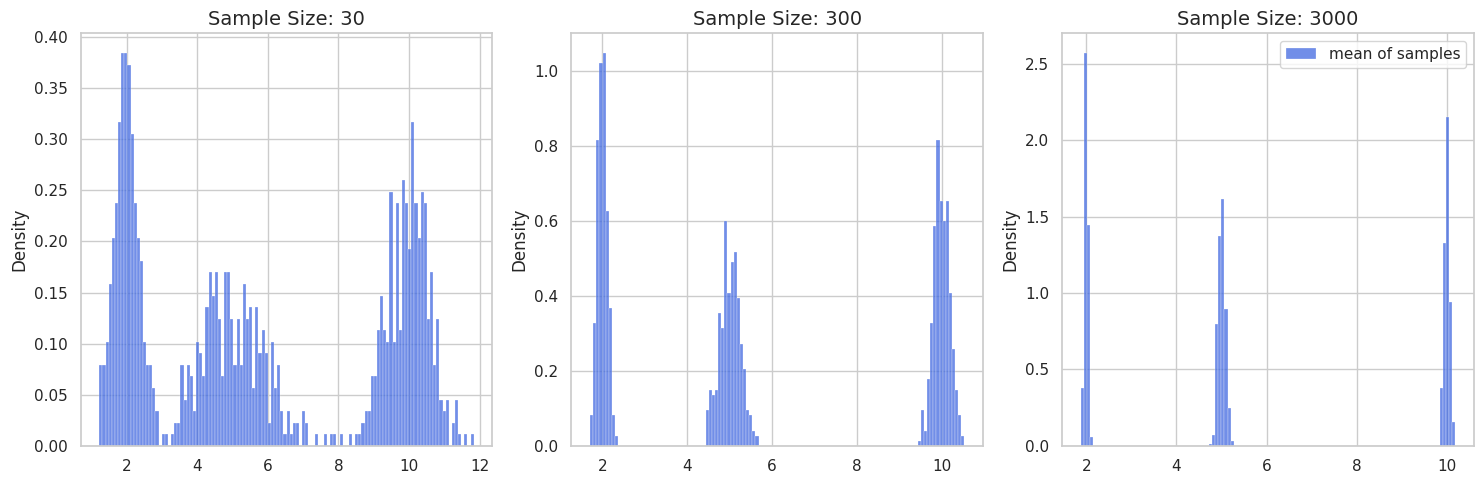

In [166]:
mixed_samples = generate_mixed_samples(num_of_samples, sample_sizes)
fig , ax = plt.subplots(1, 3, figsize=(15, 5))
x = np.linspace(0, 10, 1000)
for i, size in enumerate(sample_sizes):
    plt.subplot(1, 3, i + 1)
    plt.title(f'Sample Size: {size}', fontsize=14)
    sns.histplot(np.mean(mixed_samples[size], axis=1), bins = 120, stat = 'density', color = 'royalblue', label = 'mean of samples')

plt.legend()
plt.tight_layout()
plt.show()

In [167]:
for size in sample_sizes:
    means = np.mean(mixed_samples[size], axis=1)
    std_dev = np.std(means)
    std_err = std_dev / np.sqrt(30)
    print(f"mean of means for sample size = {size}: {np.mean(means)}\nstandard error for means: {std_err}\n")

mean of means for sample size = 30: 5.866267018499726
standard error for means: 0.6208024237449054

mean of means for sample size = 300: 5.826795768419224
standard error for means: 0.6106679881379818

mean of means for sample size = 3000: 5.792721795149538
standard error for means: 0.5976437566452774



in this section because the distribution that we are working with is the sum of 1000 sample means wich are all normal (sample sizes are compratively high) but becasue they are mixed samples from orignally three different distributions, Central limit theory does not hold anymore because normal distrubtions are not identically distributed which is a must for CLT .

in terms of graphs above, we are seeing that sum of these sample means are nothing like a normal distribution and not alliened with a normal plot with the same mean and variance of of the samples means and the reason to that is simply because CLT DOES NOT HOLD FOR THIS PROBLEM

### Reporting mean and standard error:

We can even calculate mean and standard deviation of every sample based on its distribution parameters :  
$$E[\bar{X}] = \mu$$
$$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} $$



### Sample Mean Calculations

Given that the **mean** of the sample mean is the **mean** of the distribution, and the **standard deviation** of the sample mean is the **standard deviation** of the distribution divided by the square root of the sample size, we can calculate the mean and standard deviation of the sample mean for each distribution.

#### 1. **Poisson Distribution**
For a **Poisson distribution** with parameter $ \lambda = 10 $, the mean and standard deviation are:
- Mean: $ \mu = \lambda = 10$
- Standard Deviation: $\sigma = \sqrt{\lambda} = \sqrt{10} $

The mean and standard deviation of the sample mean for different sample sizes are:

$$
\text{Mean of Sample Mean} = \mu = 10
$$

$$
\text{Standard Deviation of Sample Mean} = \frac{\sigma}{\sqrt{n}} = \frac{\sqrt{10}}{\sqrt{n}}
$$

For the given sample sizes:

- For \( n = 30 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{\sqrt{10}}{\sqrt{30}} \approx 0.577
  $$

- For \( n = 300 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{\sqrt{10}}{\sqrt{300}} \approx 0.183
  $$

- For \( n = 3000 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{\sqrt{10}}{\sqrt{3000}} \approx 0.058
  $$

#### 2. **Exponential Distribution**
For an **Exponential distribution** with rate parameter $ \lambda = 0.5 $, the mean and standard deviation are:
- Mean: $\mu = \frac{1}{\lambda} = 2 $
- Standard Deviation: $\sigma = \frac{1}{\lambda} = 2$

The mean and standard deviation of the sample mean for different sample sizes are:

$$
\text{Mean of Sample Mean} = \mu = 2
$$

$$
\text{Standard Deviation of Sample Mean} = \frac{\sigma}{\sqrt{n}} = \frac{2}{\sqrt{n}}
$$

For the given sample sizes:

- For \( n = 30 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{2}{\sqrt{30}} \approx 0.365
  $$

- For \( n = 300 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{2}{\sqrt{300}} \approx 0.115
  $$

- For \( n = 3000 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{2}{\sqrt{3000}} \approx 0.036
  $$

#### 3. **Geometric Distribution**
For a **Geometric distribution** with success probability $p = \frac{1}{5} $, the mean and standard deviation are:
- Mean: $ \mu = \frac{1}{p} = 5 $
- Standard Deviation: $\sigma = \sqrt{\frac{1-p}{p^2}} = \sqrt{\frac{4}{25}} = \frac{2}{5}$

The mean and standard deviation of the sample mean for different sample sizes are:

$$
\text{Mean of Sample Mean} = \mu = 5
$$

$$
\text{Standard Deviation of Sample Mean} = \frac{\sigma}{\sqrt{n}} = \frac{\frac{2}{5}}{\sqrt{n}}
$$

For the given sample sizes:

- For \( n = 30 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{\frac{2}{5}}{\sqrt{30}} \approx 0.365
  $$

- For \( n = 300 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{\frac{2}{5}}{\sqrt{300}} \approx 0.116
  $$

- For \( n = 3000 \):
  $$
  \text{Standard Deviation of Sample Mean} = \frac{\frac{2}{5}}{\sqrt{3000}} \approx 0.037
  $$


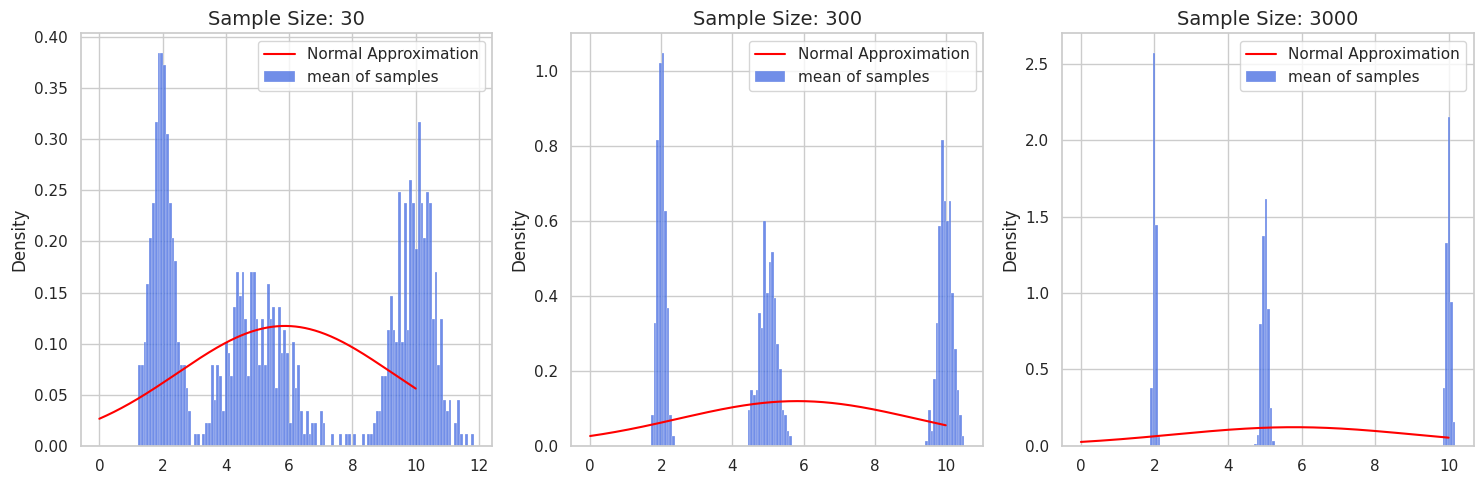

In [168]:
for i, ax in enumerate(fig.axes): 
    size = sample_sizes[i]
    means = np.mean(mixed_samples[size])
    std_dev = np.std(np.mean(mixed_samples[size], axis=1))
    ax.plot(x, stats.norm.pdf(x, loc = np.mean(means), scale=std_dev ), color='red', label='Normal Approximation')
    ax.legend()

# Update the layout and show the updated plot
fig

A normal distribution with the same mean and variance is plotted above which is of course not at all alligned with the original graph becuase as said earlier, CLT didn't hold for the distribution

normal distribution graph is so wide because of huge difference of every sample mean from mean of all sample means here

### Are Distribution in section 4 jointly normal?  
Yes! they are jointly normal becuse there are three indiependent normal distributions that we are dealing with and we know for numbers of normal distribution , the condition of being indiependt of each other is enough to call them jointly normal

### are CLT induced normal distributions necessarily jointly normal too?

No! If you have random variables that are normal due to the CLT, they are each individually normal, but they are not necessarily jointly normal .
becuase being jointly normal has its own definition which means every linear combinations between normal RVs should be normal , in another way, all normal distrubtions here should be indiependent so that must be checked too and that is not related to CLT.
